In [3]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

URL = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"
df = pd.read_csv(URL, header=None)

# Single feature for regression examples
X = df.loc[:100, 5].values.reshape(-1, 1)
y = df.loc[:100, 13].values.reshape(-1, 1)

# Multiple features for tree/forest/SVM examples
X_multi = df.loc[:100, [5, 6, 7]].values
y_multi = df.loc[:100, 13].values

# 1. Linear Regression (No Regularization)
linear_reg = LinearRegression()
linear_reg.fit(X, y)
y_pred = linear_reg.predict(X)
print("Linear Regression")
print("MSE:", mean_squared_error(y, y_pred))
print("Coefficients:", linear_reg.coef_, "\n")

# 2. Lasso Regression (L1)
lasso = Lasso(alpha=10)
lasso.fit(X, y)
y_pred = lasso.predict(X)
print("Lasso Regression")
print("MSE:", mean_squared_error(y, y_pred))
print("Coefficients:", lasso.coef_, "\n")



# 3. Ridge Regression (L2)
ridge = Ridge(alpha=100)
ridge.fit(X, y)
y_pred = ridge.predict(X)
print("Ridge Regression")
print("MSE:", mean_squared_error(y, y_pred))
print("Coefficients:", ridge.coef_, "\n")


# 4. Elastic Net (L1 + L2)
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net.fit(X, y)
y_pred = elastic_net.predict(X)
print("Elastic Net Regression")
print("MSE:", mean_squared_error(y, y_pred))
print("Coefficients:", elastic_net.coef_, "\n")

# 5. Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_multi, y_multi)
print("Decision Tree Feature Importances:", dt.feature_importances_, "\n")

# 6. Random Forest Regressor
rf = RandomForestRegressor(n_estimators=50, random_state=42)
rf.fit(X_multi, y_multi)
print("Random Forest Feature Importances:", rf.feature_importances_, "\n")

# 7. Linear SVM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_multi)
svm = SVR(kernel="linear")
svm.fit(X_scaled, y_multi)
print("SVM Coefficients (Feature Importance):", svm.coef_, "\n")


Linear Regression
MSE: 9.762853674412973
Coefficients: [[10.22660174]] 

Lasso Regression
MSE: 34.709124595627884
Coefficients: [0.] 

Ridge Regression
MSE: 25.96309109305436
Coefficients: [1.98542524] 

Elastic Net Regression
MSE: 23.54266734496628
Coefficients: [2.62596111] 

Decision Tree Feature Importances: [0.73501289 0.21270595 0.05228116] 

Random Forest Feature Importances: [0.74897257 0.2153692  0.03565823] 

SVM Coefficients (Feature Importance): [[ 4.28468508 -2.23088417 -0.04900556]] 



In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

housing = fetch_california_housing()
X, y = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Standardize features (important for GD!)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1. Stochastic Gradient Descent (SGD) - with default learning rate

sgd_reg = SGDRegressor(max_iter=200, eta0=0.01, learning_rate='constant', random_state=42)
sgd_reg.fit(X_train, y_train)
y_pred_sgd = sgd_reg.predict(X_test)
sgd_mse = mean_squared_error(y_test, y_pred_sgd)

# 2. Gradient Descent (Approx Batch GD) - more iterations + averaging

gd_reg = SGDRegressor(max_iter=1000, eta0=0.01, learning_rate='constant',
                      average=True, random_state=42)
gd_reg.fit(X_train, y_train)
y_pred_gd = gd_reg.predict(X_test)
gd_mse = mean_squared_error(y_test, y_pred_gd)

# 3. Trying different learning rates

learning_rates = [0.0001, 0.001, 0.01]
results = {}
for lr in learning_rates:
    reg = SGDRegressor(max_iter=500, eta0=lr, learning_rate='constant', random_state=42)#max_iter(epoch)goes through the dataset 500 times updating weights,eta0 = initial learning rate (α),'constant' means always use the same α
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    results[lr] = mean_squared_error(y_test, y_pred)

print("\nMSE Comparison (Lower is better):")
print(f"SGD (stochastic, 200 epochs, lr=0.01): {sgd_mse:.4f}")
print(f"GD Approx (batch-like, 1000 epochs, lr=0.01): {gd_mse:.4f}")

for lr, mse in results.items():
    print(f"Learning rate={lr}, MSE={mse:.4f}")



MSE Comparison (Lower is better):
SGD (stochastic, 200 epochs, lr=0.01): 597216466054831407104.0000
GD Approx (batch-like, 1000 epochs, lr=0.01): 24803972824667983872.0000
Learning rate=0.0001, MSE=0.5621
Learning rate=0.001, MSE=3640814.4877
Learning rate=0.01, MSE=597216466054831407104.0000


In [2]:
#Demonstrate the use of Regularization methods (LASSO and RIDGE) on non-linear data and display the coefficient values and MSE to address the overfitting problem.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 1. Load dataset
diabetes = load_diabetes()
X = diabetes.data[:, 2].reshape(-1, 1)  # Use BMI feature only
y = diabetes.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Add polynomial features (degree=5 to make it nonlinear)
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 4. Train models
ols = LinearRegression().fit(X_train_poly, y_train)#no regularization->ols
ridge = Ridge(alpha=10).fit(X_train_poly, y_train)
lasso = Lasso(alpha=0.1, max_iter=10000).fit(X_train_poly, y_train)

# 5. Predictions
y_pred_ols = ols.predict(X_test_poly)
y_pred_ridge = ridge.predict(X_test_poly)
y_pred_lasso = lasso.predict(X_test_poly)

# 6. Evaluate
print("Mean Squared Errors (Test Data)")
print(f"OLS (No Regularization): {mean_squared_error(y_test, y_pred_ols):.2f}")
print(f"Ridge Regression:        {mean_squared_error(y_test, y_pred_ridge):.2f}")
print(f"Lasso Regression:        {mean_squared_error(y_test, y_pred_lasso):.2f}\n")

print("Number of non-zero coefficients:")
print(f"OLS Coefficients:   {np.count_nonzero(ols.coef_)} / {len(ols.coef_)}")
print(f"Ridge Coefficients: {np.count_nonzero(ridge.coef_)} / {len(ridge.coef_)}")
print(f"Lasso Coefficients: {np.count_nonzero(lasso.coef_)} / {len(lasso.coef_)}")


Mean Squared Errors (Test Data)
OLS (No Regularization): 3877.88
Ridge Regression:        5196.86
Lasso Regression:        3862.71

Number of non-zero coefficients:
OLS Coefficients:   5 / 6
Ridge Coefficients: 5 / 6
Lasso Coefficients: 1 / 6


Accuracy: 0.7619047619047619
Confusion Matrix:
 [[123  23]
 [ 32  53]]


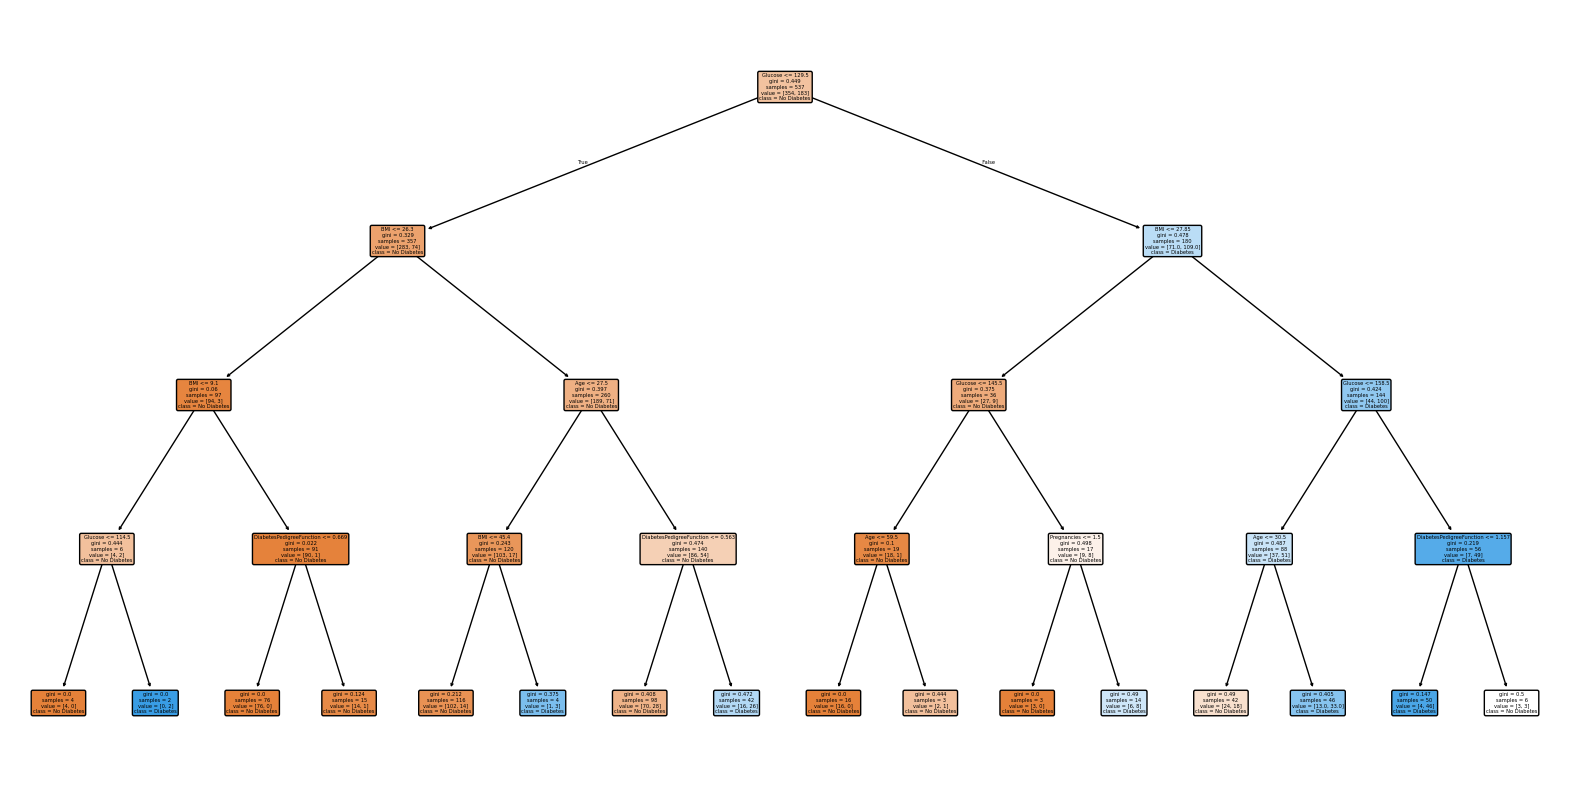

In [6]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

df = pd.read_csv("/content/diabetes_DT.csv")
# Step 3: Split features and target
X = df.drop('Outcome', axis=1)  # all columns except target
y = df['Outcome']               # target column

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Step 5: Train Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=4, random_state=1)
clf.fit(X_train, y_train)

# Step 6: Predict & Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))

# Step 7: Visualize tree
plt.figure(figsize=(20,10))
plot_tree(clf,
          feature_names=X.columns,
          class_names=['No Diabetes','Diabetes'],
          filled=True, rounded=True)
plt.show()


In [7]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Step 2: Create a Sample Loan Dataset
data = {
    'Age': ['Young', 'Young', 'Middle', 'Senior', 'Senior', 'Senior',
            'Middle', 'Young', 'Young', 'Senior', 'Young', 'Middle', 'Middle', 'Senior'],
    'Income': ['High', 'High', 'High', 'Medium', 'Low', 'Low',
               'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'High', 'Medium'],
    'Credit_History': ['Good', 'Good', 'Good', 'Good', 'Good', 'Bad',
                       'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Bad'],
    'Loan_Status': ['Approved', 'Approved', 'Approved', 'Approved', 'Denied', 'Denied',
                    'Denied', 'Denied', 'Denied', 'Approved', 'Approved', 'Denied', 'Denied', 'Denied']
}

# Convert to DataFrame
df = pd.DataFrame(data)
print("Dataset:\n", df.head())

# Step 3: Encode Categorical Variables
le = LabelEncoder()
df['Age'] = le.fit_transform(df['Age'])
df['Income'] = le.fit_transform(df['Income'])
df['Credit_History'] = le.fit_transform(df['Credit_History'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

# Step 4: Split Dataset
X = df[['Age', 'Income', 'Credit_History']]
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Train Naive Bayes Model
model = GaussianNB()
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"\nAccuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix)


Dataset:
       Age  Income Credit_History Loan_Status
0   Young    High           Good    Approved
1   Young    High           Good    Approved
2  Middle    High           Good    Approved
3  Senior  Medium           Good    Approved
4  Senior     Low           Good      Denied

Accuracy: 100.00%
Confusion Matrix:
 [[2 0]
 [0 3]]


In [8]:
# Import libraries
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# Load dataset
cancer = datasets.load_breast_cancer()

# Display features and labels
print("Features: ", cancer.feature_names)
print("Labels: ", cancer.target_names)

# Split dataset into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, test_size=0.3, random_state=109
)

# Create SVM classifier with linear kernel
clf = svm.SVC(kernel='linear')

# Train the classifier
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))


Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']
Accuracy: 0.9649122807017544
Precision: 0.9811320754716981
Recall: 0.9629629629629629


In [9]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Initialize KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%
